# 3.2. Linear Regression Implementation from Scratch
- Now that you understand the key ideas behind linear regression, we can begin to work through a hands-on implementation in code.
- In this section, we will implement the entire method from scratch, including the data pipeline, the mode, the loss function, and the gradient descent optimizer.
- While modern deep learning frameworks can automate nearly all of this work, implementing things from scratch is the only to make sure that you really know what you are doing. 

- To start off, we import the few required packages.

In [0]:
import torch
import random
from matplotlib import pyplot as plt

## 3.2.1. Generating the Dataset
- To keep things simple, we will construct an artificial dataset according to a linear model with additive noise.
- Our task will be to recover this model's parameters using the finite set of examples contained in our dataset.
- We will generate a dataset containing 1000 examples, each consisting of 2 features sampled from a standard normal distribution.
- The true parameters generating our data will be **w** = [2, -3.4] and b=4.2 and our synthetic labels will be assigned according to the following linear model with noise term e:
> **y** = **Xw** + b + e.
- You could think of e as capturing potential measurement erros on the features and labels. 

- The following code generates our synthetic dataset:

In [0]:
def synthetic_data(w, b, num_examples):
  X = torch.zeros(size=(num_examples,len(w))).normal_(mean=0,std=1)
  y = torch.matmul(X, w) + b
  y += torch.zeros(size=y.shape).normal_(mean=0,std=0.01)
  return X, y

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

- Note that each row in features consists of a 2-dimensional data point and that each row in labels consists of a 1-dimensional target value (a scalar).

In [7]:
n = 25
print('example ',n,'\n','features:',features[0],'\nlabel:',labels[0])

example  25 
 features: tensor([ 0.4232, -0.0190]) 
label: tensor(5.1226)


- By generating a scaater plot using the second features[:, 1] and labels, we can clearly observe the linear correlation between the two.

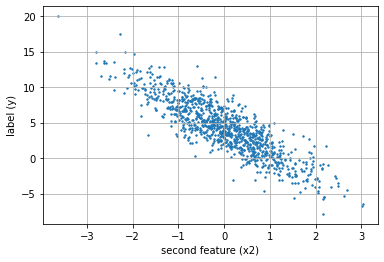

In [24]:
fig=plt.figure()
ax=fig.gca()
ax.scatter(features[:,1].numpy(), labels.numpy(),s=2)
ax.set_xlabel('second feature (x2)')
ax.set_ylabel('label (y)')
ax.grid('both')

- scatter3D를 이용해 2개의 feature와 label의 관계를 살펴볼 수도 있습니다.

Text(0.5, 0, 'x2')

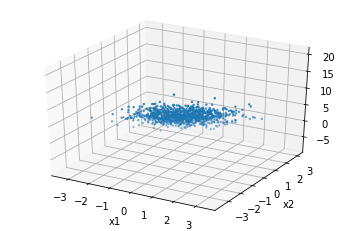

In [22]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter3D(features[:,0].numpy(),features[:,1].numpy(),labels.numpy(),s=2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')